<a href="https://colab.research.google.com/github/Pogeyann/Machine-Learning/blob/main/Luminar_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RAIN PREDICTION**


---



##Importing the Dependencies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score,recall_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter


In [ ]:
# df = pd.read_csv('weatherAUS.csv')

##Reading the file

In [ ]:
#Reading the file using pandas
df = pd.read_csv('/content/drive/Othercomputers/My Laptop/fileo/ML projects/weatherAUS.csv')

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


While looking the values it is seen that difference between 75% and max values are infact higher in Rainfall column

## DATA CLEANING

In [ ]:
df.shape

(145460, 23)

### Changing the Datetime to year, month and day

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['year'] = df['Date'].dt.year # dt is a pandass accessor to extract year ,month, time etcc.

In [ ]:
df['month'] = df['Date'].dt.month

In [ ]:
df['day'] = df['Date'].dt.day

In [ ]:
df['Date'].head()

0   2008-12-01
1   2008-12-02
2   2008-12-03
3   2008-12-04
4   2008-12-05
Name: Date, dtype: datetime64[ns]

## Find the missing values

In [ ]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
year                 0
month                0
day                  0
dtype: int64

## Checking the datatypes of the dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

Here there are 4 non numerical columns and remaining are float64 values

## Checking the counts of the values

In [ ]:
wind_group = df.groupby('WindGustDir') ['WindGustDir'].count()
wind_group
# or df['WindGustDir'].value_counts()

#windDir9am, WindDir3pm, WindGustDIr has same categorical values

WindGustDir
E      9181
ENE    8104
ESE    7372
N      9313
NE     7133
NNE    6548
NNW    6620
NW     8122
S      9168
SE     9418
SSE    9216
SSW    8736
SW     8967
W      9915
WNW    8252
WSW    9069
Name: WindGustDir, dtype: int64

In [ ]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
year                 0
month                0
day                  0
dtype: int64

In [ ]:
# Here Categorical values are filled using Backward fill
df['WindGustDir'].fillna("bfill",inplace=True)
df['WindDir9am'] = df['WindDir9am'].fillna("bfill")
df['WindDir3pm'] = df['WindDir3pm'].fillna("bfill")

In [ ]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir          0
WindGustSpeed    10263
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
year                 0
month                0
day                  0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    145460 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     145460 non-null  object        
 10  WindDir3pm     145460 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [ ]:
df.shape

(145460, 26)

* drop output null values.



In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [ ]:
print(df['RainToday'].value_counts())
print('*'*100)
print(df['RainTomorrow'].value_counts())

No     110319
Yes     31880
Name: RainToday, dtype: int64
****************************************************************************************************
No     110316
Yes     31877
Name: RainTomorrow, dtype: int64


Here we have non numerical values in our output column `Raintomorrow`

Using function and apply to convert non numerical value into numericals & and used the same technique in rain today which belongs to the input 

In [ ]:
def rain(x):
    if x == 'No': return 0
    if x == 'Yes': return 1

In [ ]:
df['RainToday'] = df['RainToday'].apply(rain)
df['RainTomorrow'] = df['RainTomorrow'].apply(rain)

In [ ]:
df.head(20)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,0.0,0.0,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,2008,12,5
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,1005.4,NaN,NaN,20.6,28.9,0.0,0.0,2008,12,6
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,1008.2,1.0,NaN,18.1,24.6,0.0,0.0,2008,12,7
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,1010.1,NaN,NaN,16.3,25.5,0.0,0.0,2008,12,8
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,1003.6,NaN,NaN,18.3,30.2,0.0,1.0,2008,12,9
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,1005.7,NaN,NaN,20.1,28.2,1.0,0.0,2008,12,10


In [ ]:
df.shape

(145460, 26)

checking how many missing values in rain today and rain tomorrow

In [ ]:
print(df['RainToday'].isna().sum())
print('_'*100)
print('\n')
print(df['RainTomorrow'].isna().sum())

3261
____________________________________________________________________________________________________


3267


we are dropping the output missing value columns to get maximum accuracy

In [ ]:
df.dropna(subset=['RainTomorrow'],inplace=True)

Using mode function added values in the Rain Today column because it is contains discrete values

In [ ]:
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    142193 non-null  object        
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     142193 non-null  object        
 10  WindDir3pm     142193 non-null  object        
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

In [ ]:
df.shape

(142193, 26)

Only lost approx 3000 columns

In [ ]:
print(df['RainToday'].isna().sum())
print('_'*100)
print('\n')
print(df['RainTomorrow'].isna().sum())

0
____________________________________________________________________________________________________


0


In [ ]:
df['RainTomorrow']=df['RainTomorrow'].astype(int)

i already said that while checking rainfall found that outliers are there,

so i removed outliers using loc function

In [ ]:
df['Rainfall'].describe()

count    140787.000000
mean          2.349974
std           8.465173
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         371.000000
Name: Rainfall, dtype: float64

In [ ]:
df = df[df['Rainfall']<=100]


now we had lost another 2000 values

In [ ]:
df.shape

(140637, 26)

In [ ]:
# df34 = df[df['Evaporation']>=100].shape
# df34

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140637 entries, 0 to 145458
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           140637 non-null  datetime64[ns]
 1   Location       140637 non-null  object        
 2   MinTemp        140170 non-null  float64       
 3   MaxTemp        140331 non-null  float64       
 4   Rainfall       140637 non-null  float64       
 5   Evaporation    81068 non-null   float64       
 6   Sunshine       73890 non-null   float64       
 7   WindGustDir    140637 non-null  object        
 8   WindGustSpeed  131542 non-null  float64       
 9   WindDir9am     140637 non-null  object        
 10  WindDir3pm     140637 non-null  object        
 11  WindSpeed9am   139585 non-null  float64       
 12  WindSpeed3pm   138111 non-null  float64       
 13  Humidity9am    139122 non-null  float64       
 14  Humidity3pm    137141 non-null  float64       
 15  

In [ ]:
df['Rainfall']=df['Rainfall'].astype(float)

here i have seen that i filled and removed missing values in non numerical and integer datatype column , the only remaining is float64.dtype columns

In [ ]:
df.isna().sum()


Date                 0
Location             0
MinTemp            467
MaxTemp            306
Rainfall             0
Evaporation      59569
Sunshine         66747
WindGustDir          0
WindGustSpeed     9095
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1052
WindSpeed3pm      2526
Humidity9am       1515
Humidity3pm       3496
Pressure9am      13733
Pressure3pm      13759
Cloud9am         52593
Cloud3pm         56058
Temp9am            655
Temp3pm           2620
RainToday            0
RainTomorrow         0
year                 0
month                0
day                  0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140637 entries, 0 to 145458
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           140637 non-null  datetime64[ns]
 1   Location       140637 non-null  object        
 2   MinTemp        140170 non-null  float64       
 3   MaxTemp        140331 non-null  float64       
 4   Rainfall       140637 non-null  float64       
 5   Evaporation    81068 non-null   float64       
 6   Sunshine       73890 non-null   float64       
 7   WindGustDir    140637 non-null  object        
 8   WindGustSpeed  131542 non-null  float64       
 9   WindDir9am     140637 non-null  object        
 10  WindDir3pm     140637 non-null  object        
 11  WindSpeed9am   139585 non-null  float64       
 12  WindSpeed3pm   138111 non-null  float64       
 13  Humidity9am    139122 non-null  float64       
 14  Humidity3pm    137141 non-null  float64       
 15  

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
count,140170.000000,140331.000000,140637.000000,81068.000000,73890.000000,131542.000000,139585.000000,138111.000000,139122.000000,137141.000000,...,126878.000000,88044.000000,84579.000000,139982.000000,138017.000000,140637.000000,140637.000000,140637.000000,140637.000000,140637.000000
mean,12.176866,23.232981,2.202899,5.472676,7.637686,39.954813,13.982326,18.627140,68.804273,51.417847,...,1015.266334,4.427298,4.495572,16.981816,21.691167,0.222594,0.221066,2012.757461,6.405924,15.714357
std,6.401384,7.116722,7.015151,4.189284,3.777483,13.560139,8.875893,8.793869,19.058902,20.791706,...,7.031546,2.886133,2.719416,6.496311,6.939840,0.415990,0.414966,2.542378,3.425785,8.798241
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,36.000000,...,1010.500000,1.000000,2.000000,12.300000,16.600000,0.000000,0.000000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,...,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000,0.000000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,7.400000,10.700000,48.000000,19.000000,24.000000,83.000000,66.000000,...,1020.000000,7.000000,7.000000,21.600000,26.400000,0.000000,0.000000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,99.400000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,...,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000,1.000000,2017.000000,12.000000,31.000000


In [ ]:
# mean = df['MinTemp'].mean()
# df['MinTemp'] = df['MinTemp'].fillna(mean)

In [ ]:
df['MinTemp'].isna().sum()

467

In [ ]:
df['MinTemp'].dtype

dtype('float64')

Here converting the output into integer because both are discrete values.

 Filling mean values in the float

so i used loop and statements to fillover missing values and float64 datatype columns using mean of the column (15cols)

In [ ]:


print('Columns were mean values are filled:')
for i in df.columns:

    if (df[i].dtype == 'float64') & (df[i].isna().sum() != 0):
        print(i)
        df[i].fillna(df[i].mean(),inplace=True)

        
        

Columns were mean values are filled:
MinTemp
MaxTemp
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm


now lets see the everything is cleared.

In [ ]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
month            0
day              0
dtype: int64

In [ ]:
#Checking  
df.RainTomorrow.value_counts()

0    109547
1     31090
Name: RainTomorrow, dtype: int64

In [ ]:
#Dropping Date column

df.drop('Date',axis=1,inplace=True)


ok now lets dive into exploratory data analysis

## EDA - Exploratory Data Analysis

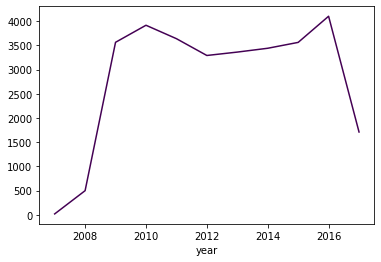

In [ ]:
rain_year = df.groupby('year') ['RainTomorrow'].sum()
rain_year.plot(kind='line',colormap='viridis')
plt.show()

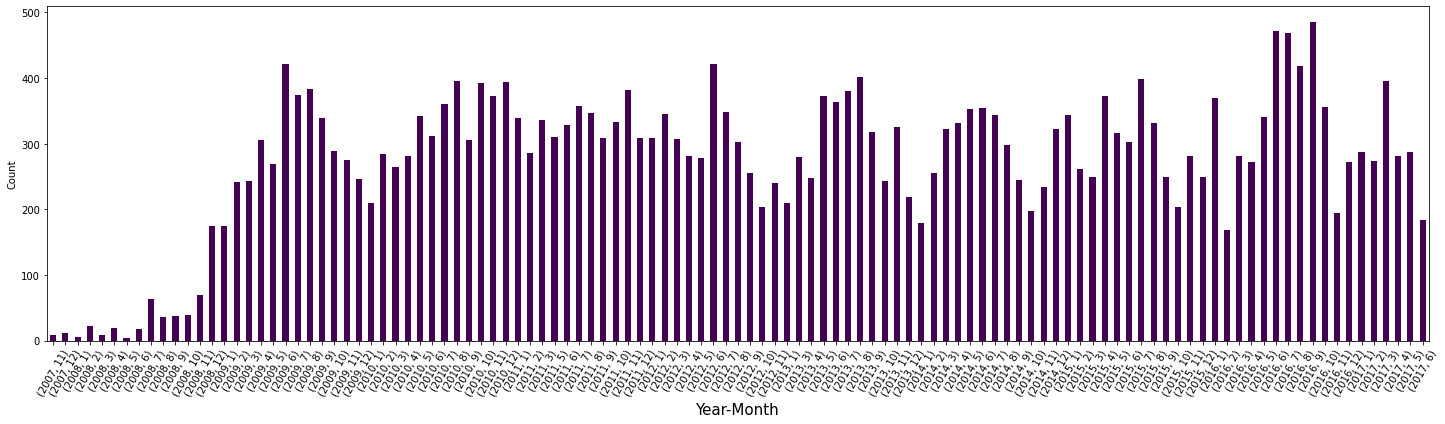

In [ ]:
rain_year_month = df.groupby(['year','month'])['RainTomorrow'].sum()

plt.figure(figsize=(20,6))

rain_year_month.plot(kind='bar',cmap='viridis')
plt.xlabel('Year-Month',size=15)
plt.xticks(rotation=60)
plt.tight_layout()
plt.ylabel('Count')
plt.show()

Rainfall measures the actual amount of precipitation(like snow,rain,sleet etc) that occurred during a specific time period,

 whereas RainTomorrow is a prediction of whether it will rain or not tomorrow based on the weather data available today.

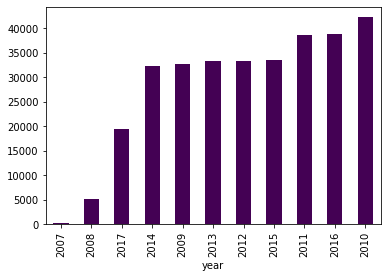

In [ ]:
Year_rainfall = df.groupby('year') ['Rainfall'].sum().sort_values(ascending=True)
Year_rainfall.plot(kind='bar',colormap='viridis')
plt.show()

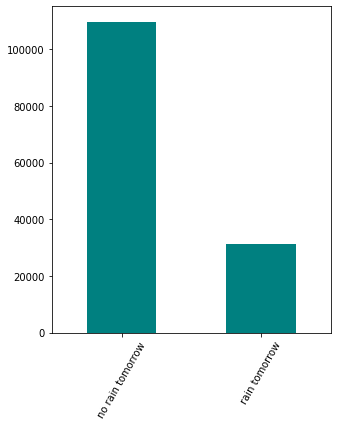

In [ ]:
fig, ax = plt.subplots()
roww = ['no rain tomorrow','rain tomorrow']
df['RainTomorrow'].value_counts().plot(kind='bar',color='Teal',figsize=(5,6))
ax.set_xticklabels(roww)
plt.xticks(rotation = 60)
plt.show()

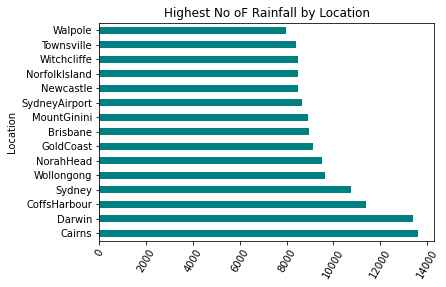

In [ ]:
df['Location'].value_counts().size
df8 = df.groupby('Location') ['Rainfall'].sum().sort_values(ascending=False).head(15)
df8.plot.barh(x='Location', y='Rainfall',color='Teal')
plt.xticks(rotation=60)
plt.title('Highest No oF Rainfall by Location')
plt.show()

In [ ]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'year', 'month', 'day'],
      dtype='object')

## Using Dummies to convert Categorical into numericals,
### COlumns are WindGustDir, WindDir9am, WindDir3pm, Location

In [ ]:
df_dummy = pd.get_dummies(df[['WindGustDir','WindDir9am','WindDir3pm','Location']],drop_first=True)

Dropped columns whie using get dummies 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Location' from the dataframe

## Created a new dataframe by the concatenation of old dataframe and Dummy coded data.

In [ ]:
new_df = pd.concat([df,df_dummy],axis=1)

In [ ]:
new_df.drop(['WindGustDir','WindDir9am','WindDir3pm','Location'],axis=1,inplace=True)

In [ ]:
new_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,13.4,22.9,0.6,5.472676,7.637686,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,0,0
1,7.4,25.1,0.0,5.472676,7.637686,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,5.472676,7.637686,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,0
3,9.2,28.0,0.0,5.472676,7.637686,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,5.472676,7.637686,41.0,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
new_df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru',
       'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia',
       'Location_Williamtown', 'Location_Witchcliffe', 'Location_Wollongong',
       'Location_Woomera'],
      dtype='object', length=117)

## Input Value (x)

In [ ]:
#Splitting x and y values
x = new_df.drop('RainTomorrow',axis=1).values


In [ ]:
df.RainTomorrow.value_counts()

0    109547
1     31090
Name: RainTomorrow, dtype: int64

## Output value (y)

In [ ]:
y = new_df.RainTomorrow.values
y

array([0, 0, 0, ..., 0, 0, 0])

##Train Test Spliting

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
rain_tomorrow = df[df['RainTomorrow']==1]
no_rain_tomorrow = df[df['RainTomorrow']==0]

Rain_ratio = round(len(rain_tomorrow)/float(len(no_rain_tomorrow))*100, 2)
print(f'Ratio and Percentage of Raining and not raining is {len(rain_tomorrow)/float(len(no_rain_tomorrow))} & {Rain_ratio}%')
print(f'Rain Tomorrow : {len(rain_tomorrow)}')
print(f'No rain tomorrow : {len(no_rain_tomorrow)}')

Ratio and Percentage of Raining and not raining is 0.28380512474097874 & 28.38%
Rain Tomorrow : 31090
No rain tomorrow : 109547


It is found that dataset is slightly imbalanced 
first we will work out modelling without oversampling
percentage of the model is 28% which is greater than 25% so will be considered as slightly imbalanced

## Building Models

## KNN Model

In [ ]:
kn_model = KNeighborsClassifier(n_neighbors=9)
kn_model.fit(x_train,y_train)
y_pred = kn_model.predict(x_test)


In [ ]:
knn_accuracy = accuracy_score(y_test,y_pred)
knn_accuracy

0.8440344141069397

## Random Forest Model

In [ ]:
RF_model = RandomForestClassifier()
RF_model.fit(x_train,y_train)
y_pred = RF_model.predict(x_test)


###predicting

In [ ]:
y_pred1 = RF_model.predict([[7.40000000e+00, 2.51000000e+01, 0.00000000e+00, 5.47267603e+00,
       7.63768575e+00, 4.40000000e+01, 4.00000000e+00, 2.20000000e+01,
       4.40000000e+01, 2.50000000e+01, 1.01060000e+03, 1.00780000e+03,
       4.42729771e+00, 4.49557219e+00, 1.72000000e+01, 2.43000000e+01,
       0.00000000e+00, 2.00800000e+03, 1.20000000e+01, 2.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])
print(y_pred1)

[0]


## RF Model Accuracy

In [ ]:
rf_model_accuracy = accuracy_score(y_test,y_pred)
rf_model_accuracy

0.857259670079636

###Confusion Matrix

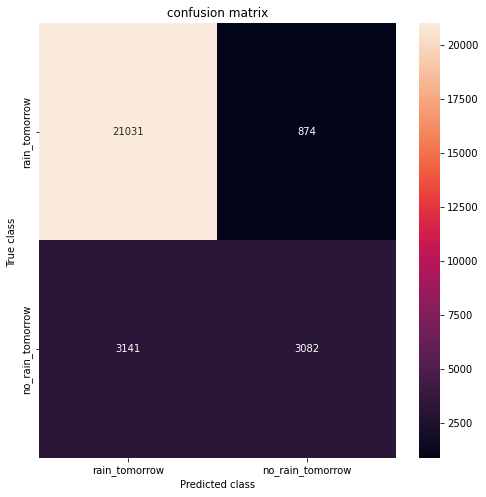

In [ ]:
conf_matrix =confusion_matrix(y_test,y_pred)
labels = ['rain_tomorrow','no_rain_tomorrow']
plt.figure(figsize=(8,8))
sns.heatmap(conf_matrix,xticklabels= labels, yticklabels= labels,annot = True, fmt = 'd')
plt.title('confusion matrix')
plt.ylabel('True class ')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
rf_report = classification_report(y_test,y_pred)
print(rf_report)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     21905
           1       0.78      0.50      0.61      6223

    accuracy                           0.86     28128
   macro avg       0.82      0.73      0.76     28128
weighted avg       0.85      0.86      0.84     28128



In [ ]:
rf_precision = precision_score(y_test,y_pred)
rf_precision

0.7790697674418605

In [ ]:
rf_recallscore = recall_score(y_test,y_pred)
rf_recallscore

0.4952595211312872

## Gaussian Model

In [ ]:
Gaussian_model = GaussianNB()
Gaussian_model.fit(x_train,y_train)
y_pred = Gaussian_model.predict(x_test)

In [ ]:
Gaussian_acc = accuracy_score(y_test,y_pred)
Gaussian_acc

0.6420648464163823

##CATBOOST

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.8 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=2000, eval_metric = "AUC")
cat.fit(x_train, y_train)

Learning rate set to 0.040996
0:	total: 83.6ms	remaining: 2m 47s
1:	total: 116ms	remaining: 1m 56s
2:	total: 163ms	remaining: 1m 48s
3:	total: 198ms	remaining: 1m 38s
4:	total: 234ms	remaining: 1m 33s
5:	total: 267ms	remaining: 1m 28s
6:	total: 298ms	remaining: 1m 24s
7:	total: 332ms	remaining: 1m 22s
8:	total: 371ms	remaining: 1m 22s
9:	total: 406ms	remaining: 1m 20s
10:	total: 445ms	remaining: 1m 20s
11:	total: 480ms	remaining: 1m 19s
12:	total: 514ms	remaining: 1m 18s
13:	total: 547ms	remaining: 1m 17s
14:	total: 587ms	remaining: 1m 17s
15:	total: 630ms	remaining: 1m 18s
16:	total: 666ms	remaining: 1m 17s
17:	total: 706ms	remaining: 1m 17s
18:	total: 738ms	remaining: 1m 16s
19:	total: 774ms	remaining: 1m 16s
20:	total: 817ms	remaining: 1m 16s
21:	total: 853ms	remaining: 1m 16s
22:	total: 885ms	remaining: 1m 16s
23:	total: 917ms	remaining: 1m 15s
24:	total: 950ms	remaining: 1m 15s
25:	total: 981ms	remaining: 1m 14s
26:	total: 1.01s	remaining: 1m 14s
27:	total: 1.05s	remaining: 1m 14s

In [ ]:
y_pred = cat.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[20885  1020]
 [ 2730  3493]]
0.8666808873720137
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     21905
           1       0.77      0.56      0.65      6223

    accuracy                           0.87     28128
   macro avg       0.83      0.76      0.78     28128
weighted avg       0.86      0.87      0.86     28128



##ALL MODELS

In [ ]:
ddff = pd.DataFrame({'Model':['KNN Model','RF Model','Gaussian Model'], 'Accuracy':[knn_accuracy,rf_model_accuracy,Gaussian_acc]})
ddff.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy
1,RF Model,0.857260
0,KNN Model,0.844034
2,Gaussian Model,0.642065
